In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# Importing the dataset
data = pd.read_csv("data.csv")

# list of first five rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# check for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# shape
data.shape

(7043, 21)

In [6]:
data = data.drop(["customerID"], axis = 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data[data["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
# converting datatype of TotalCharges into numeric
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### There are 11 missing values in TotalCharges

In [9]:
# replacing the missing values in TotalCharges with the mean
data["TotalCharges"].fillna(data["TotalCharges"].mean(),inplace=True)

In [10]:
data[data["tenure"] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,2283.300441,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,2283.300441,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,2283.300441,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,2283.300441,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,2283.300441,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,2283.300441,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,2283.300441,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,2283.300441,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,2283.300441,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,2283.300441,No


In [11]:
# removing the rows where tenure = 0
data.drop(labels=data[data["tenure"] == 0].index, axis = 0, inplace = True)

# EDA

<Axes: ylabel='Churn'>

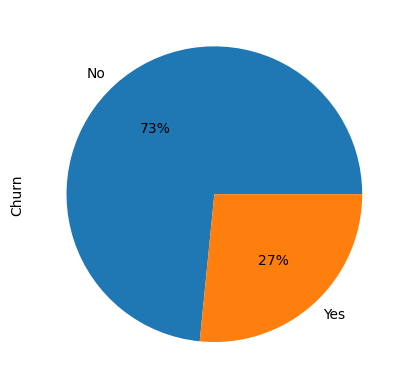

In [12]:
data["Churn"].value_counts().plot(kind="pie",autopct='%1.0f%%')

In [13]:
# relation between gender and churn
x=pd.crosstab(data["gender"],data["Churn"])
x

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


<Axes: xlabel='gender'>

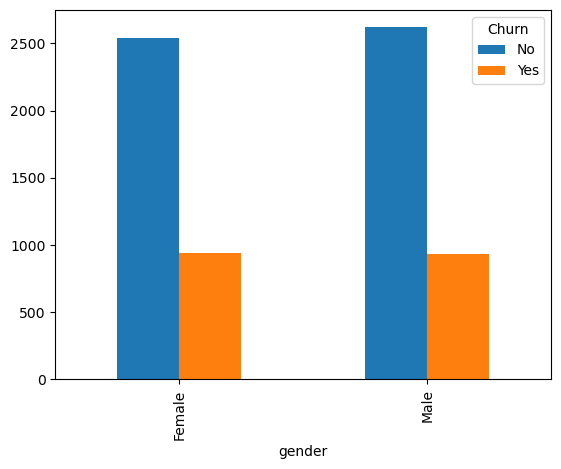

In [14]:
x.plot(kind="bar")

In [15]:
# relation between contract and churn
pd.crosstab(data["Contract"],data["Churn"],normalize="index")

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887228,0.112772
Two year,0.971513,0.028487


#### Customers with monthly contract are more likely to churn

<Axes: >

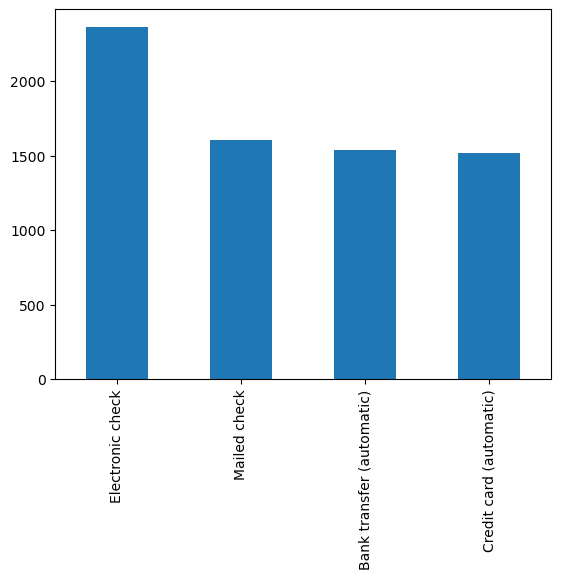

In [16]:
data['PaymentMethod'].value_counts().plot(kind="bar")

In [17]:
pd.crosstab(data[data["gender"]=="Male"]["InternetService"],data[data["gender"]=="Male"]["Churn"])

Churn,No,Yes
InternetService,,
DSL,992,240
Fiber optic,910,633
No,717,57


In [18]:
pd.crosstab(data[data["gender"]=="Female"]["InternetService"],data[data["gender"]=="Female"]["Churn"])

Churn,No,Yes
InternetService,,
DSL,965,219
Fiber optic,889,664
No,690,56


<Axes: xlabel='Dependents'>

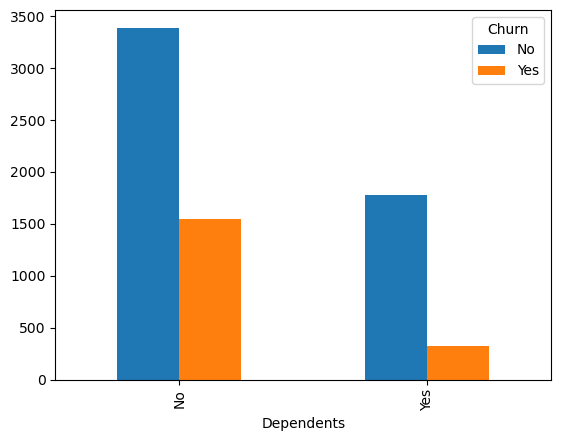

In [19]:
# relation between Dependents and churn
pd.crosstab(data["Dependents"],data["Churn"]).plot(kind="bar")

Customers without dependents are more likely to churn.

<Axes: xlabel='Partner'>

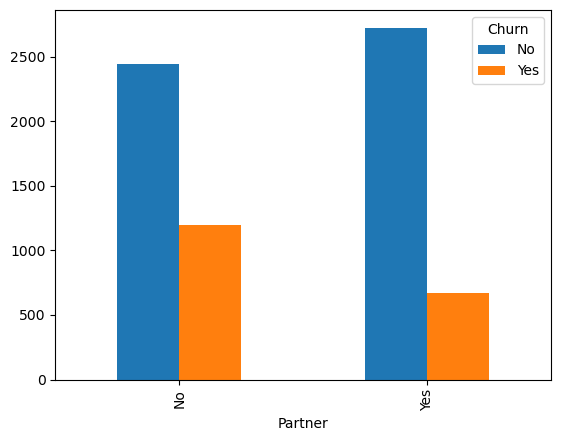

In [20]:
# relation between Partner and churn
pd.crosstab(data["Partner"],data["Churn"]).plot(kind="bar")

<Axes: xlabel='SeniorCitizen'>

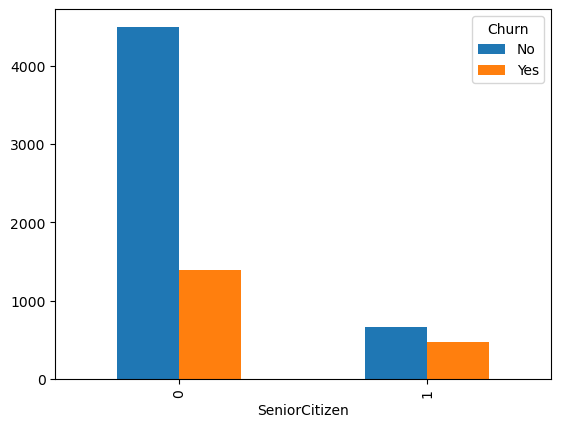

In [21]:
# relation between SeniorCitizen and churn
pd.crosstab(data["SeniorCitizen"],data["Churn"]).plot(kind="bar")

<Axes: xlabel='OnlineSecurity'>

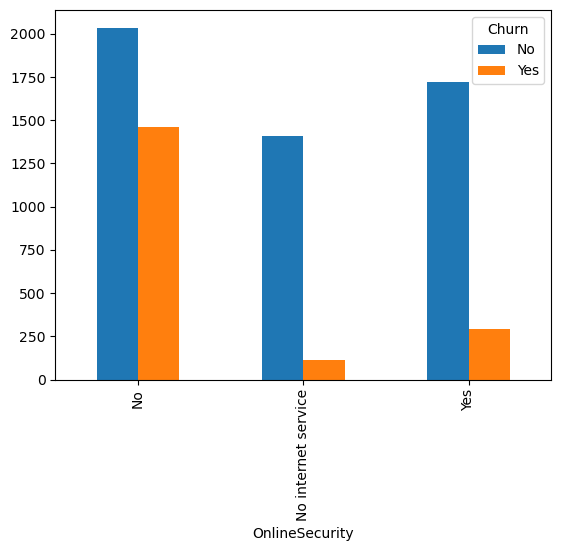

In [22]:
# relation between Onlinesecurity and churn
pd.crosstab(data["OnlineSecurity"],data["Churn"]).plot(kind="bar")

<Axes: xlabel='PaperlessBilling'>

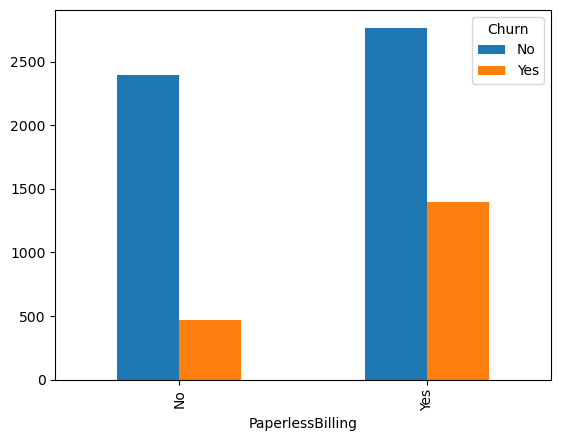

In [23]:
# relation between PaperlessBilling and churn
pd.crosstab(data["PaperlessBilling"],data["Churn"]).plot(kind="bar")

Customers with paperless billing are more likely to churn.

<Axes: xlabel='TechSupport'>

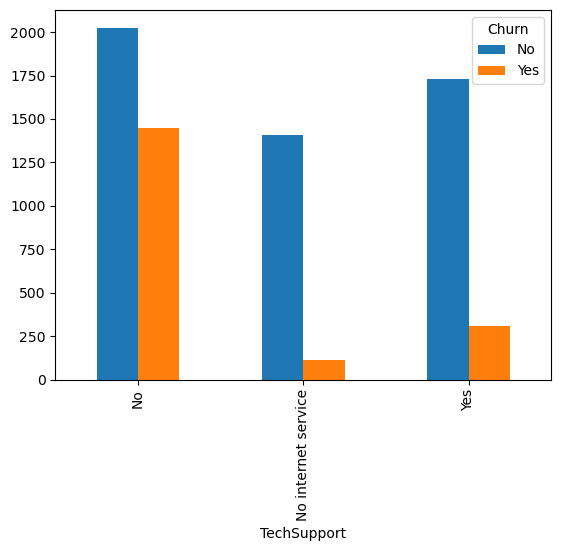

In [24]:
# relation between TechSupport and churn
pd.crosstab(data["TechSupport"],data["Churn"]).plot(kind="bar")

customers with no TechSupport are most likely to migrate to another service provider.

<Axes: xlabel='PhoneService'>

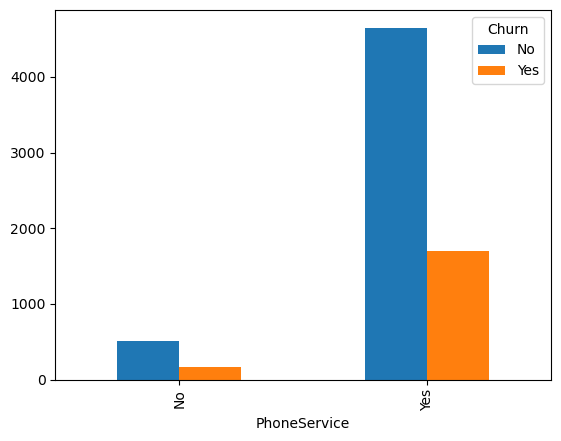

In [25]:
# relation between PhoneService and churn
pd.crosstab(data["PhoneService"],data["Churn"]).plot(kind="bar")

In [26]:
# relation between Tenure and churn
pd.crosstab(data["tenure"],data["Churn"],normalize="columns")

Churn,No,Yes
tenure,,
1,0.045129,0.203317
2,0.022274,0.065811
3,0.020531,0.050294
4,0.018013,0.044409
5,0.013364,0.034243
...,...,...
68,0.017625,0.004815
69,0.016851,0.004280
70,0.020918,0.005886


New customers are more likely to churn

In [27]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Feature Engineering

In [28]:
# Label Encoding
data["gender"]=data["gender"].map({"Female":0,"Male":1})
data["Partner"]=data["Partner"].map({"No":0,"Yes":1})
data["Dependents"]=data["Dependents"].map({"No":0,"Yes":1})
data["PhoneService"]=data["PhoneService"].map({"No":0,"Yes":1})
data["PaperlessBilling"]=data["PaperlessBilling"].map({"No":0,"Yes":1})
data["Churn"]=data["Churn"].map({"No":0,"Yes":1})


In [29]:
# creating dummies
data=pd.get_dummies(data,drop_first=True)

## Model Development

In [30]:
# separating the dependent and independent variables
X = data.drop(columns = "Churn")
y = data["Churn"]

In [31]:
# splitting the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =12)

### Logistic Regression

In [32]:
lg=LogisticRegression(max_iter=1000)
lg.fit(X_train,y_train) # Training the model

LogisticRegression(max_iter=1000)

In [33]:
lg.score(X_train,y_train) # Train Accuracy

0.8037383177570093

In [34]:
lg.score(X_test,y_test) # Test Accuracy

0.8033175355450237

In [35]:
pred_test=lg.predict(X_test) # prediction on test data

In [36]:
# Classification Report
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1567
           1       0.63      0.57      0.60       543

    accuracy                           0.80      2110
   macro avg       0.74      0.73      0.73      2110
weighted avg       0.80      0.80      0.80      2110



In [37]:
prob_test_1=lg.predict_proba(X_test)[:,1]

In [38]:
## Model Evaluation
def classification_eva(act, pred, probs):
    ac1=metrics.accuracy_score(act, pred)
    rc1=metrics.recall_score(act, pred)
    pc1=metrics.precision_score(act, pred)
    f1=metrics.f1_score(act, pred)
    auc1=metrics.roc_auc_score(act, pred)
    result={"Accuracy":ac1, "Recall":rc1, "Precision":pc1, "F1 score":f1, "AUC":auc1}
    fpr, tpr, threshold=metrics.roc_curve(act,probs )
    plt.plot([0,1],[0,1],'k--', label="AUC: "+str(auc1))
    plt.plot(fpr,tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.legend()
    plt.show()
    return result

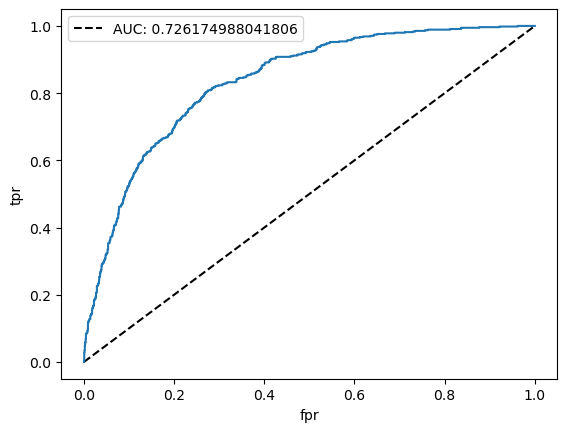

{'Accuracy': 0.8033175355450237,
 'Recall': 0.567219152854512,
 'Precision': 0.6311475409836066,
 'F1 score': 0.5974781765276431,
 'AUC': 0.726174988041806}

In [39]:
classification_eva(y_test,pred_test,prob_test_1)

### Decision Tree

In [40]:
# using RandomizedsearchCV for hyperparameter tuning
params={"criterion":["gini", "entropy"],
"max_depth": [2,3,4,5,7,9],
"min_samples_split" :[5,10,15,20,50,100],
"min_samples_leaf" : [5,10,15,20,50,80,100]}

dtg=DecisionTreeClassifier(random_state=0)
r_search=RandomizedSearchCV(estimator=dtg,param_distributions=params , cv=10, n_jobs=2)
r_search.fit(X_train, y_train) 

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 7, 9],
                                        'min_samples_leaf': [5, 10, 15, 20, 50,
                                                             80, 100],
                                        'min_samples_split': [5, 10, 15, 20, 50,
                                                              100]})

In [41]:
r_search.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=50, min_samples_split=20,
                       random_state=0)

In [42]:
# training the model using best values of hyperparameters
dt=DecisionTreeClassifier(max_depth=9, min_samples_leaf=50, min_samples_split=20,
                       random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=50, min_samples_split=20,
                       random_state=0)

In [43]:
dt.score(X_train,y_train) # Train Accuracy

0.8116619260463226

In [44]:
dt.score(X_test,y_test) # Test Accuracy

0.7900473933649289

In [45]:
pred_test1=dt.predict(X_test) # prediction on test data

In [46]:
# Classification Report
print(metrics.classification_report(y_test,pred_test1))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1567
           1       0.61      0.52      0.56       543

    accuracy                           0.79      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [47]:
prob_test_2=dt.predict_proba(X_test)[:,1]

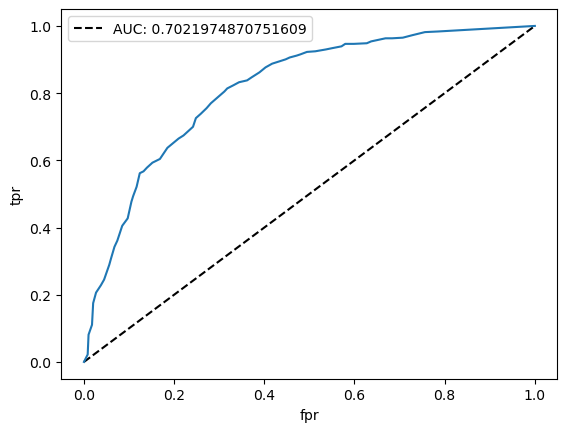

{'Accuracy': 0.7900473933649289,
 'Recall': 0.5211786372007366,
 'Precision': 0.6072961373390557,
 'F1 score': 0.5609514370664023,
 'AUC': 0.7021974870751609}

In [48]:
## Model Evaluation
classification_eva(y_test,pred_test1,prob_test_2)

### Random Forest

In [49]:
# using RandomizedsearchCV for hyperparameter tuning
params_rf={"criterion":["gini","entropy"],
          "max_depth":[9,11,13,15,17,20],
          "min_samples_split":[20,50,100,200],
          "min_samples_leaf":[2,5,20,10],
          "n_estimators":[50,100,150,200],
          "bootstrap":[True],
          "max_features":["sqrt","log2"],
          "max_samples":[.7,.75,.8,.9]}

rSearch_rf=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=params_rf,cv=5,n_jobs=2)
rSearch_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=2,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [9, 11, 13, 15, 17, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_samples': [0.7, 0.75, 0.8, 0.9],
                                        'min_samples_leaf': [2, 5, 20, 10],
                                        'min_samples_split': [20, 50, 100, 200],
                                        'n_estimators': [50, 100, 150, 200]})

In [50]:
rSearch_rf.best_estimator_

RandomForestClassifier(max_depth=9, max_features='log2', max_samples=0.7,
                       min_samples_leaf=2, min_samples_split=20,
                       n_estimators=150)

In [51]:
# training the model using best values of hyperparameters
rf=RandomForestClassifier(max_depth=9, max_features='log2', max_samples=0.7,
                       min_samples_leaf=2, min_samples_split=20,
                       n_estimators=150)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, max_features='log2', max_samples=0.7,
                       min_samples_leaf=2, min_samples_split=20,
                       n_estimators=150)

In [52]:
rf.score(X_train,y_train) # Train Accuracy

0.8283218203982121

In [53]:
rf.score(X_test,y_test) # Test Accuracy

0.8071090047393364

In [54]:
pred_test2=rf.predict(X_test) # prediction on test data

In [55]:
# Classification Report
print(metrics.classification_report(y_test,pred_test2))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1567
           1       0.67      0.50      0.57       543

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110



In [56]:
prob_test_3=rf.predict_proba(X_test)[:,1]

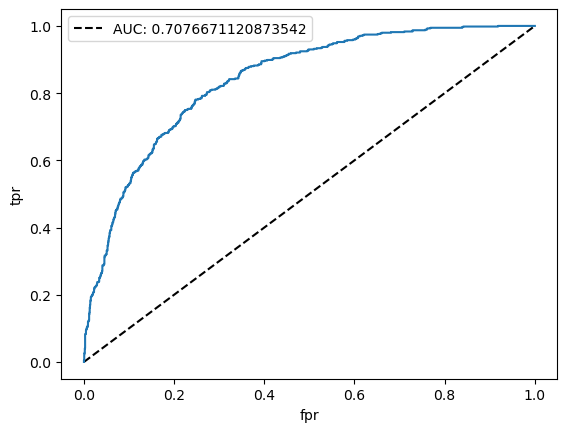

{'Accuracy': 0.8071090047393364,
 'Recall': 0.5027624309392266,
 'Precision': 0.6658536585365854,
 'F1 score': 0.5729275970619098,
 'AUC': 0.7076671120873542}

In [57]:
## Model Evaluation
classification_eva(y_test,pred_test2,prob_test_3)

We have used Logistic Regression, Decision Tree and Random Forest for Model Development.
Based on the evaluation of models, we will select Logistic Regression for making predictions as it has accuracy of about 80% and better recall and precision value than the other two models.